In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, naive_bayes, datasets, decomposition,metrics, ensemble, neighbors

PCA representa  99.98% da informação original


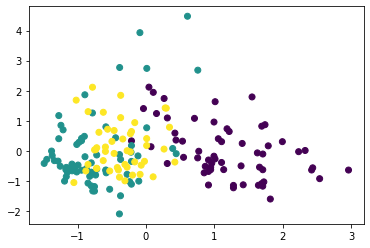

In [38]:
wine = datasets.load_wine()

pca = decomposition.PCA(n_components=2, whiten=True, svd_solver='randomized')
pca = pca.fit(wine.data)
X = pca.transform(wine.data)


y = wine.target
labels = wine.target_names

plt.scatter(X[:,0],X[:,1],c=y)

print('PCA representa %6.2f%% da informação original'%(sum(pca.explained_variance_ratio_)*100))



In [39]:
def make_meshgrid(x, y, h=.02):
    
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def clf_meshgrid(clf,x,y):
  cc = clf.predict(np.c_[x.ravel(),y.ravel()])
  return cc

xx, yy = make_meshgrid(X[:, 0], X[:, 1])

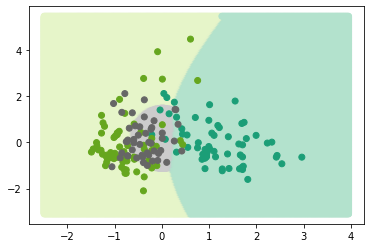

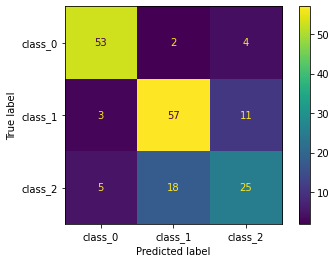

In [40]:
NBGauss = naive_bayes.GaussianNB()
NBGauss = NBGauss.fit(X,y)

c = clf_meshgrid(NBGauss,xx,yy)

plt.scatter(xx,yy,c=c,cmap='Pastel2')
plt.scatter(X[:, 0], X[:, 1],c=y,cmap='Dark2')
metrics.plot_confusion_matrix(NBGauss, X, y,include_values=True,display_labels=labels)

plt.show()

0.7247191011235955


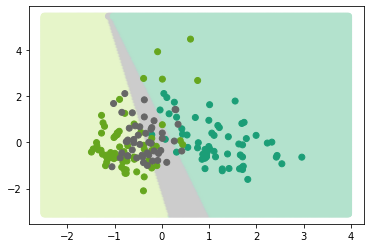

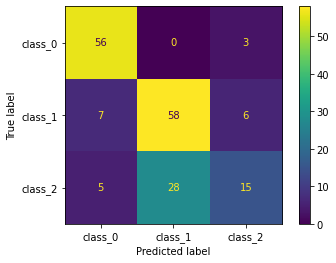

In [63]:
svmLinear = svm.SVC(kernel='linear', probability = True)
svmLinear = svmLinear.fit(X,y)

print(metrics.accuracy_score(y, svmLinear.predict(X)))

c = clf_meshgrid(svmLinear,xx,yy)

plt.scatter(xx,yy,c=c,cmap='Pastel2')
plt.scatter(X[:, 0], X[:, 1],c=y,cmap='Dark2')
metrics.plot_confusion_matrix(svmLinear, X, y,include_values=True,display_labels=labels)

plt.show()

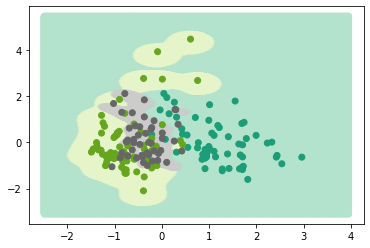

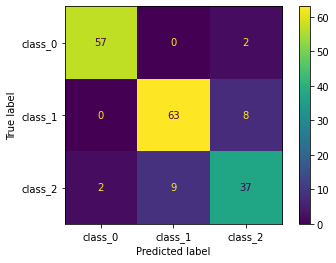

In [42]:
svmRBF = svm.SVC(kernel='rbf', gamma = 12, probability = True)
svmRBF = svmRBF.fit(X,y)

c = clf_meshgrid(svmRBF,xx,yy)

plt.scatter(xx,yy,c=c,cmap='Pastel2')
plt.scatter(X[:, 0], X[:, 1],c=y,cmap='Dark2')
metrics.plot_confusion_matrix(svmRBF, X, y,include_values=True,display_labels=labels)

plt.show()

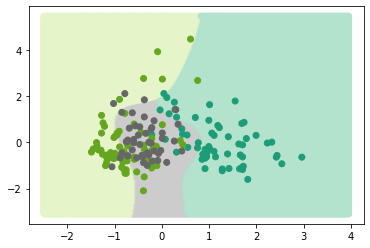

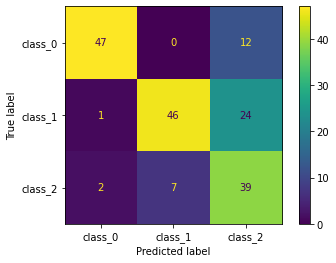

In [43]:
svmPoli = svm.SVC(kernel='poly', degree=3, probability = True)
svmPoli = svmPoli.fit(X,y)

c = clf_meshgrid(svmPoli,xx,yy)

plt.scatter(xx,yy,c=c,cmap='Pastel2')
plt.scatter(X[:, 0], X[:, 1],c=y,cmap='Dark2')
metrics.plot_confusion_matrix(svmPoli, X, y,include_values=True,display_labels=labels)

plt.show()

0.6179775280898876


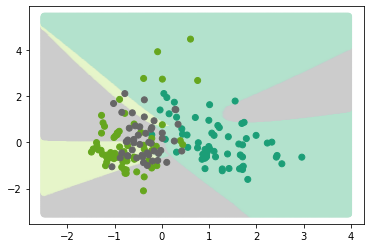

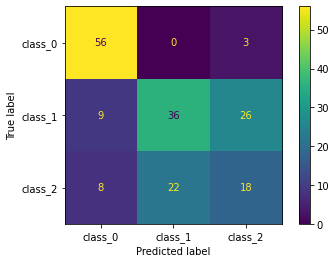

In [65]:
svmSig = svm.SVC(kernel='sigmoid', gamma =1.5, probability = True)
svmSig = svmSig.fit(X,y)

print(metrics.accuracy_score(y, svmSig.predict(X)))

c = clf_meshgrid(svmSig,xx,yy)

plt.scatter(xx,yy,c=c,cmap='Pastel2')
plt.scatter(X[:, 0], X[:, 1],c=y,cmap='Dark2')
metrics.plot_confusion_matrix(svmSig, X, y,include_values=True,display_labels=labels)

plt.show()

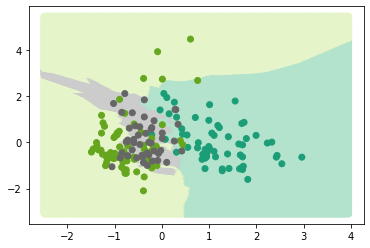

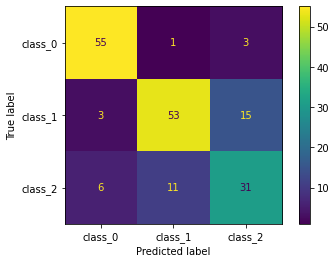

In [81]:
knn = neighbors.KNeighborsClassifier(7)
knn = knn.fit(X,y)

c = clf_meshgrid(knn,xx,yy)

plt.scatter(xx,yy,c=c,cmap='Pastel2')
plt.scatter(X[:, 0], X[:, 1],c=y,cmap='Dark2')
metrics.plot_confusion_matrix(knn, X, y,include_values=True,display_labels=labels)

plt.show()

0.8764044943820225


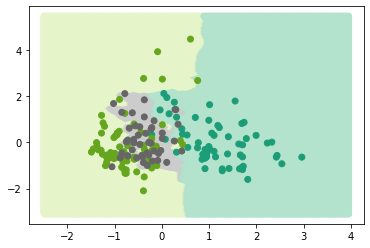

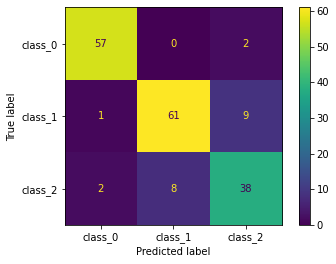

In [80]:
pesos = [metrics.accuracy_score(y,svmLinear.predict(X)),
         metrics.accuracy_score(y,svmRBF.predict(X)),
         metrics.accuracy_score(y,svmPoli.predict(X)),
         metrics.accuracy_score(y,svmSig.predict(X)),
         metrics.accuracy_score(y,NBGauss.predict(X)),
         metrics.accuracy_score(y,knn.predict(X))]






comite = ensemble.VotingClassifier(estimators=[('SVM Linear',svmLinear),
                                               ('SVM RBF',svmRBF),
                                               ('SVM Poli',svmPoli),
                                               ('SVM Sig',svmSig),
                                               ('NB Gauss',NBGauss ),
                                               ('KNN',knn )],
                                   voting = 'soft', weights = pesos)

comite = comite.fit(X,y)
print(metrics.accuracy_score(y,comite.predict(X)))



c = clf_meshgrid(comite,xx,yy)

plt.scatter(xx,yy,c=c,cmap='Pastel2')
plt.scatter(X[:, 0], X[:, 1],c=y,cmap='Dark2')
metrics.plot_confusion_matrix(comite, X, y,include_values=True,display_labels=labels)
plt.show()
                                   


In [66]:
pesos = [metrics.accuracy_score(y,svmLinear.predict(X)),
         metrics.accuracy_score(y,svmRBF.predict(X)),
         metrics.accuracy_score(y,svmPoli.predict(X)),
         metrics.accuracy_score(y,svmSig.predict(X)),
         metrics.accuracy_score(y,NBGauss.predict(X)),
         metrics.accuracy_score(y,knn.predict(X))]

print(pesos)

[0.7247191011235955, 0.8820224719101124, 0.7415730337078652, 0.6179775280898876, 0.7584269662921348, 0.8707865168539326]
